In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13150430.csv")  #12413370,13266000, 13311000, 13340600, 13092747, 12305000, 13342500, 13150430

print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0            152  2010-06-01      0.76               4.4               11.1   
1            153  2010-06-02      1.26               5.6               11.3   
2            154  2010-06-03      2.97               6.0               12.2   
3            155  2010-06-04      1.97               8.5               13.4   
4            156  2010-06-05      8.47               8.7               12.6   
...          ...         ...       ...               ...                ...   
1282        4940  2023-08-27      1.63              13.5               21.3   
1283        4941  2023-08-28      0.00              12.3               21.1   
1284        4942  2023-08-29      0.00              12.1               21.9   
1285        4943  2023-08-30      0.00              11.6               22.1   
1286        4944  2023-08-31      0.00               4.3               13.4   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.746335
X_00010_00001,0.746335,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000          0.047770          -0.123569   
tmin..degrees.C.    0.047770          1.000000           0.927798   
tmean..degrees.C.  -0.123569          0.927798           1.000000   
tmax..degrees.C.   -0.233066          0.797334           0.964834   
tdmean..degrees.C.  0.367172          0.478036           0.243947   
vpdmin..hPa.       -0.276628          0.611202           0.739810   
vpdmax..hPa.       -0.292371          0.694540           0.897927   
X_00010_00001      -0.197199          0.615070           0.728796   
X_00010_00003      -0.186835          0.716091           0.817091   
X_00060_00003       0.072216         -0.155352          -0.218433   
doy                -0.026025          0.415043           0.447562   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.233066            0.367172     -0.276628   
tmin..degrees.C.       

<Axes: >

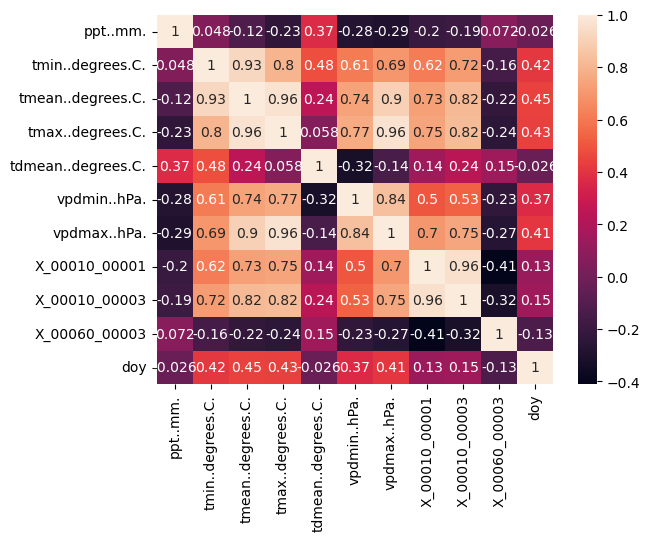

In [4]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
ppt..mm.           1.000000          -0.123569     -0.292371       0.072216
tmean..degrees.C. -0.123569           1.000000      0.897927      -0.218433
vpdmax..hPa.      -0.292371           0.897927      1.000000      -0.272030
X_00060_00003      0.072216          -0.218433     -0.272030       1.000000


<Axes: >

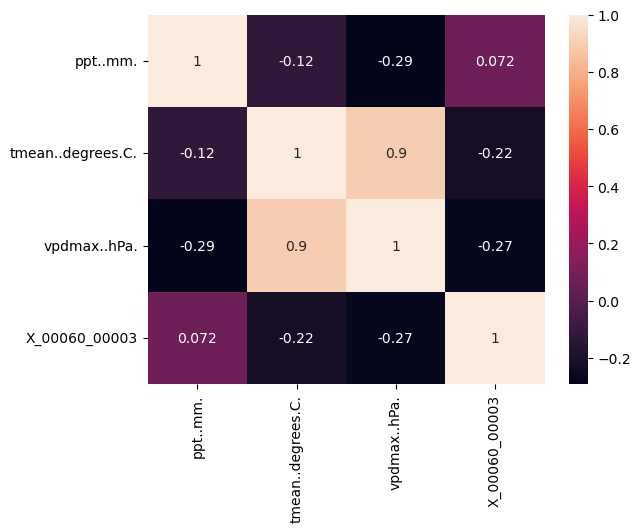

In [5]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [6]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

      ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
358       0.00               19.6         26.10          122.0
1090      0.00               13.6         18.55           70.1
764       0.00               17.3         26.87          109.0
135       0.00               19.6         34.31           95.3
277       0.00               12.3         20.44           76.1
...        ...                ...           ...            ...
1044      1.65               24.4         46.99           64.9
1095      0.00               16.0         30.35           59.5
1130      0.00               21.8         45.09           92.3
860       0.00               17.6         30.85          117.0
1126      0.00               18.9         33.80          101.0

[1029 rows x 4 columns]
358     17.6
1090    14.4
764     16.0
135     19.0
277     16.4
        ... 
1044    20.4
1095    15.1
1130    19.6
860     17.0
1126    17.7
Name: X_00010_00003, Length: 1029, dtype: float64
Index(['ppt..mm.', 'tmean.

In [7]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]
X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'yr']
0       13.0
1       13.9
2       14.6
3       14.2
4       14.6
        ... 
1006    16.8
1007    17.5
1008    17.6
1009    16.5
1010    14.6
Name: X_00010_00003, Length: 1011, dtype: float64


0.8270901811477103


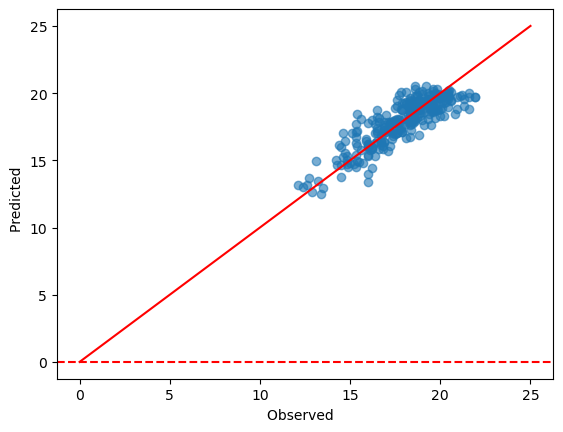

test: 0.856146450086105
0.7809910502310632


In [8]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [9]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.6403948324207747
test correlation_coefficient: 0.6690644432454945
MSE: 1.1656879986972823
RMS: 1.4560739919949153
max depth: 2
test correlation_coefficient: 0.771192317110796
test correlation_coefficient: 0.7991128738941782
MSE: 0.9262509781103906
RMS: 1.1603229913133934
max depth: 3
test correlation_coefficient: 0.8103864101751713
test correlation_coefficient: 0.8342339168607527
MSE: 0.8425798945565346
RMS: 1.0745936852144973
max depth: 4
test correlation_coefficient: 0.8399592316100445
test correlation_coefficient: 0.855014406330139
MSE: 0.8140056300425218
RMS: 1.0335019101425584
max depth: 5
test correlation_coefficient: 0.8592383451914221
test correlation_coefficient: 0.8420826030100875
MSE: 0.8456432036165765
RMS: 1.0747762614742613
max depth: 6
test correlation_coefficient: 0.8774057344517073
test correlation_coefficient: 0.7784670888592717
MSE: 0.9738703946566817
RMS: 1.2473747032956584
max depth: 7
test correlation_coefficient: 0.896

max depth: 5
correlation_coefficient: 0.8420826030100875
MSE: 0.8456432036165765
RMS: 1.0747762614742613


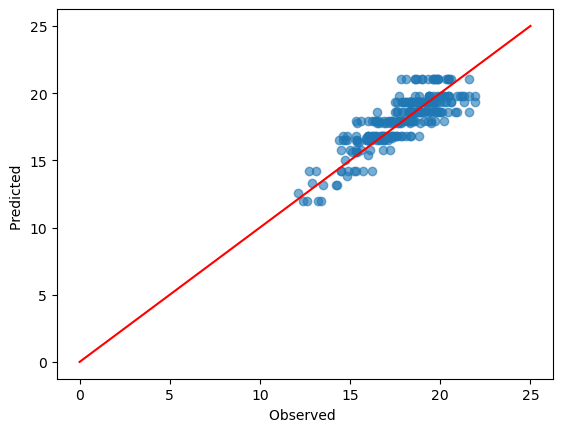

In [10]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [11]:
print(regr.feature_importances_)
print(idv)

[0.022398   0.9093524  0.01709281 0.04220638 0.00895041]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']


In [12]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [13]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.0437


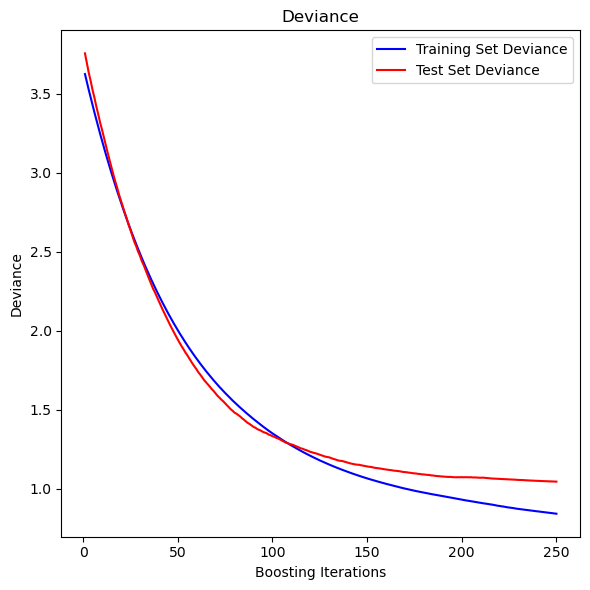

In [14]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

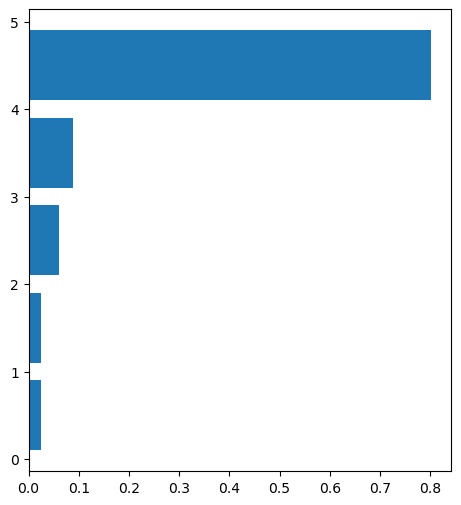

In [15]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [16]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

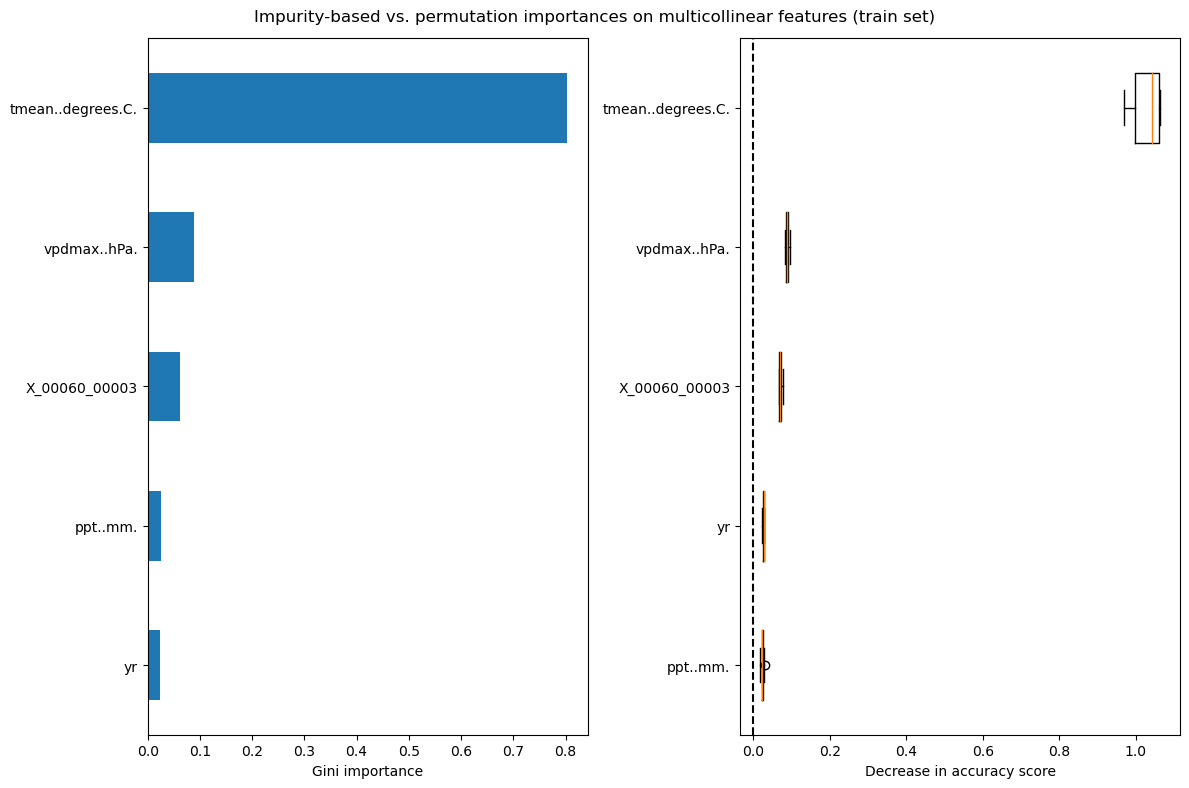

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.8520638601224626
MSE: 0.7792690278962127
RMS: 1.02151282404779


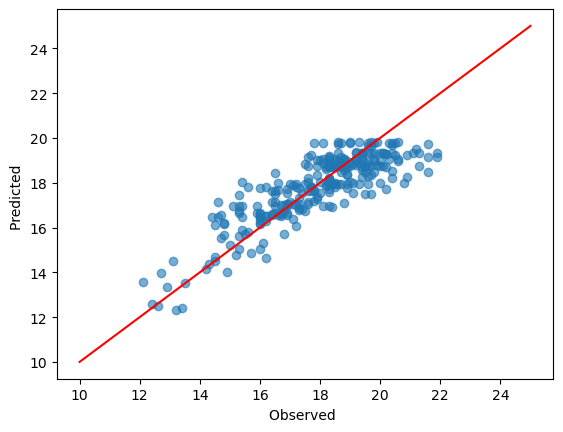

In [26]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(10, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [19]:
print(y_test)
print(yfit)

1011    18.4
1012    19.5
1013    20.9
1014    20.6
1015    19.4
        ... 
1282    17.2
1283    17.7
1284    17.0
1285    15.4
1286    14.6
Name: X_00010_00003, Length: 276, dtype: float64
[16.9271537  17.51042366 18.26800134 18.96753588 18.71394188 17.0424748
 16.63714542 17.10457488 17.20585363 17.11903471 12.4843094  15.69092718
 17.02767313 18.73401769 18.72986659 18.20220959 17.68478906 17.91872492
 18.73639548 18.73639548 18.24034267 18.72602823 19.32056402 18.73639548
 17.99832064 17.99832064 18.49958894 18.72986659 19.32056402 19.32056402
 19.1598923  18.71988561 19.21585927 19.67270155 19.48698101 19.16494032
 19.72133417 19.77659072 19.05449031 18.87095156 19.32056402 19.79792135
 19.64761687 18.89381859 18.77543658 18.96753588 18.85502685 19.05449031
 19.79792135 18.33864953 18.33936268 19.32056402 18.97359141 18.73639548
 18.87095156 18.96753588 19.72133417 18.56294099 18.80905858 18.5168257
 19.65541468 17.95199032 18.30984742 17.49616241 18.22116135 19.23360959
 19.776

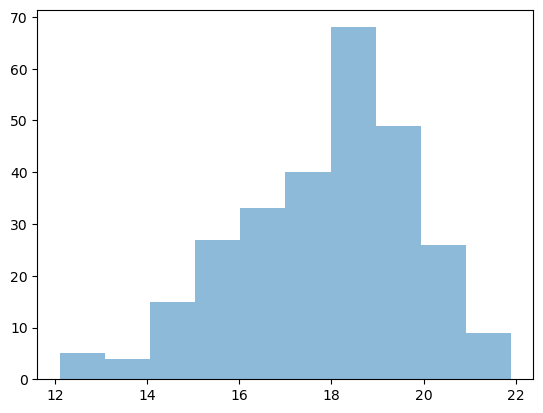

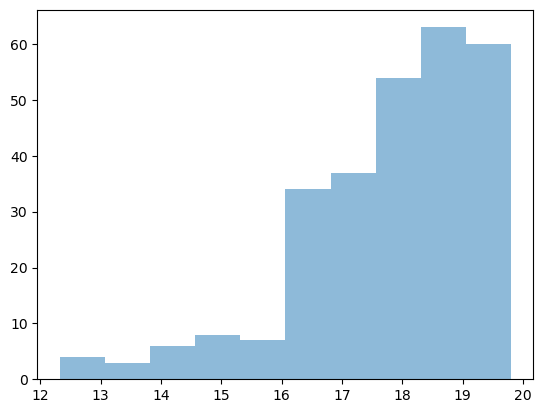

In [20]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

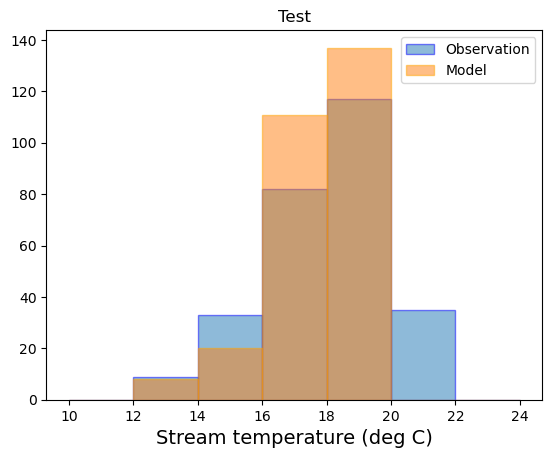

In [25]:
bins = np.arange(10, 25, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

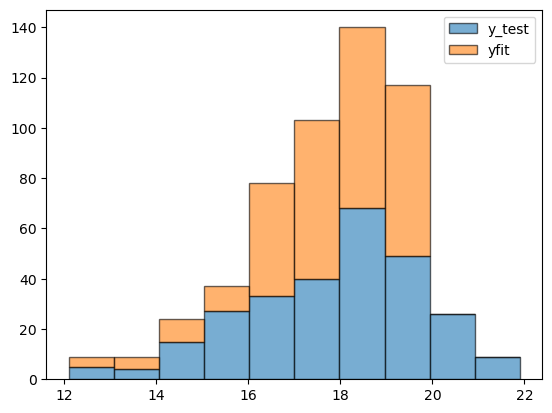

In [23]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

Text(0.5, 1.0, 'Test')

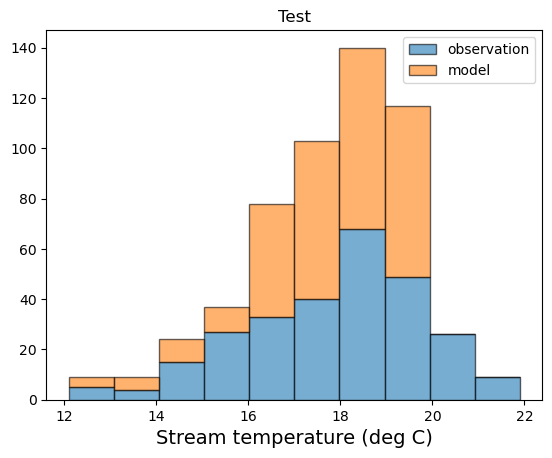

In [24]:
plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
plt.legend()
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")